<a href="https://colab.research.google.com/github/thanhduc206/-AI---Fuzzy-logic/blob/main/CNNhw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW#1** NHẬN DIỆN HOA


In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [8]:
train_dir = '/content/drive/MyDrive/flowers'
img_width, img_height = 128, 128


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [10]:
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/flowers',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 478 images belonging to 5 classes.
Found 478 images belonging to 5 classes.


In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(5, activation='softmax')
])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9830 - loss: 0.0450 - val_accuracy: 0.9979 - val_loss: 0.0107
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9695 - loss: 0.1030 - val_accuracy: 0.9979 - val_loss: 0.0120
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9744 - loss: 0.0615 - val_accuracy: 0.9979 - val_loss: 0.0066
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9489 - loss: 0.1365 - val_accuracy: 0.9979 - val_loss: 0.0043
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9833 - loss: 0.0559 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9546 - loss: 0.1044 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9752 - loss: 0.0877 - val_accuracy: 0.9958 - val_loss: 0.0090
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9701 - loss: 0.0747 - val_accuracy: 0.9979 - v

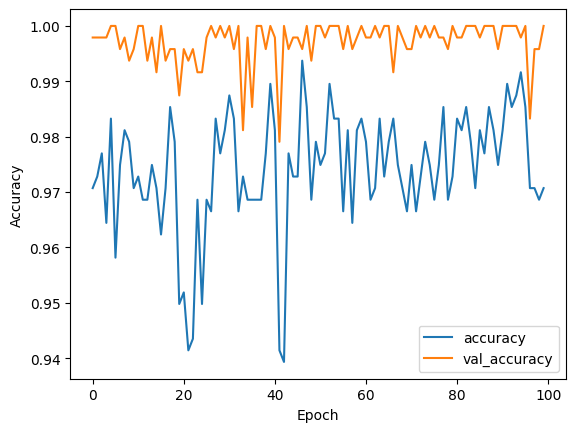

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
def load_images_from_folder(folder, img_size):
    images = []
    file_names = []

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)


        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img) / 255.0
        images.append(img)
        file_names.append(filename)

    return np.array(images), file_names




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


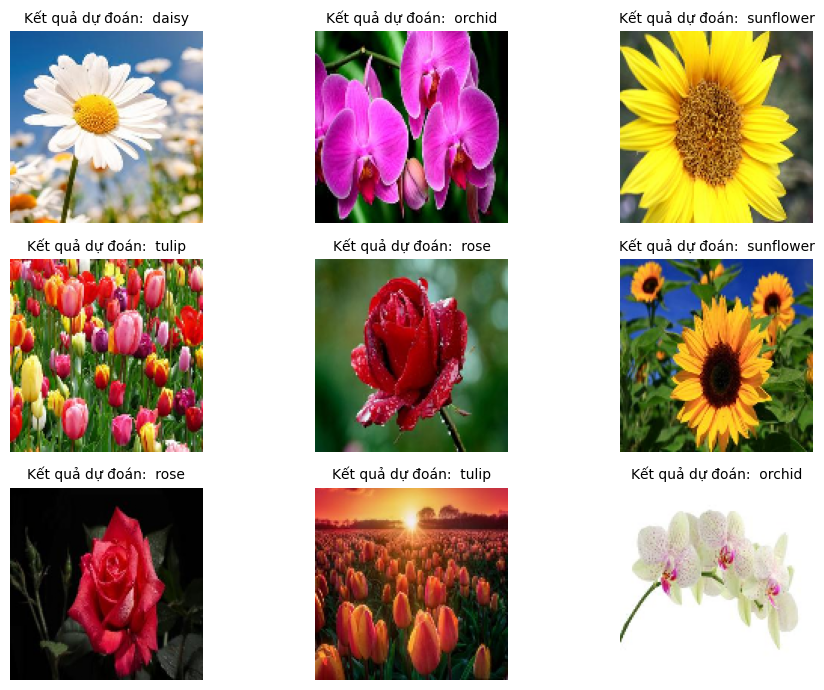

In [18]:
test_folder = "/content/drive/MyDrive/flowers_test"
test_images, test_file_names = load_images_from_folder(test_folder, (img_width, img_height))


predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_food_names = [class_labels[idx] for idx in predicted_labels]


rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 7))

axes = axes.flatten()
for i in range(min(rows * cols, len(test_images))):
    axes[i].imshow(test_images[i])
    axes[i].axis('off')
    axes[i].set_title(f"Kết quả dự đoán:  {predicted_food_names[i]}", fontsize=10)

plt.tight_layout()
plt.show()

HW#2 NHẬN DIỆN ĐỒ ĂN

In [35]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [36]:
train_dir = '/content/drive/MyDrive/vietnam foods'
img_width, img_height = 128, 128

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [38]:
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/vietnam foods',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 406 images belonging to 5 classes.
Found 406 images belonging to 5 classes.


In [39]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.6),
    Dense(5, activation='softmax')
])



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,586,181 (17.49 MB)

 Trainable params: 4,585,221 (17.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 851ms/step - accuracy: 0.2118 - loss: 3.6277 - val_accuracy: 0.2315 - val_loss: 1.6050
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 339ms/step - accuracy: 0.3190 - loss: 2.2727 - val_accuracy: 0.2340 - val_loss: 1.7100
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.3808 - loss: 1.5912 - val_accuracy: 0.2094 - val_loss: 1.8910
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 337ms/step - accuracy: 0.2971 - loss: 1.5633 - val_accuracy: 0.2094 - val_loss: 2.2601
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - accuracy: 0.3671 - loss: 1.5154 - val_accuracy: 0.2094 - val_loss: 2.7235
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 388ms/step - accuracy: 0.4193 - loss: 1.4683 - val_accuracy: 0.2094 - val_loss: 3.1303
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - accuracy: 0.3498 - loss: 1.4978 - val_accuracy: 0.2094 - val_loss: 3.6794
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.4209 - loss: 1.4107 - val_acc

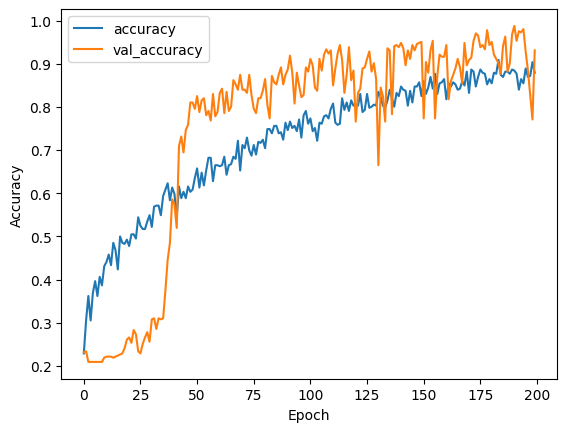

In [40]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=200)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
def load_images_from_folder(folder, img_size):
    images = []
    file_names = []

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)


        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img) / 255.0
        images.append(img)
        file_names.append(filename)

    return np.array(images), file_names

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


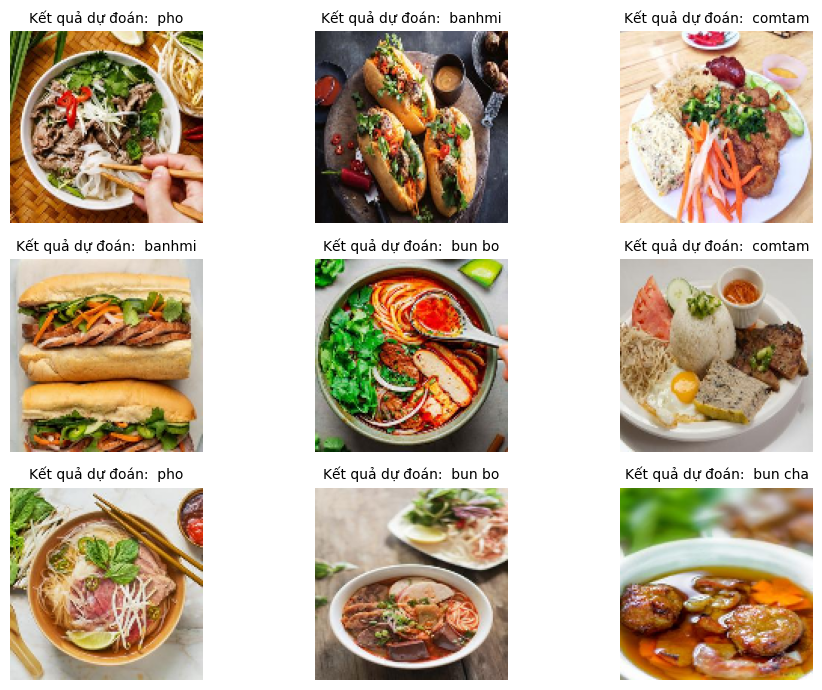

In [42]:
test_folder = "/content/drive/MyDrive/foods_test"
test_images, test_file_names = load_images_from_folder(test_folder, (img_width, img_height))


predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_food_names = [class_labels[idx] for idx in predicted_labels]


rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 7))

axes = axes.flatten()
for i in range(min(rows * cols, len(test_images))):
    axes[i].imshow(test_images[i])
    axes[i].axis('off')
    axes[i].set_title(f"Kết quả dự đoán:  {predicted_food_names[i]}", fontsize=10)

plt.tight_layout()
plt.show()

HW#3 NHẬN DIỆN KHUÔN MẶT

In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [10]:
train_dir = '/content/drive/MyDrive/Faces'
img_width, img_height = 128, 128

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Faces',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 55 images belonging to 3 classes.
Found 55 images belonging to 3 classes.


In [13]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),  # Thêm Batch Normalization
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.6),
    Dense(3, activation='softmax')
])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,585,667 (17.49 MB)

 Trainable params: 4,584,707 (17.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.4852 - loss: 1.6468 - val_accuracy: 0.3636 - val_loss: 1.0843
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 356ms/step - accuracy: 0.8042 - loss: 0.6433 - val_accuracy: 0.3273 - val_loss: 1.0831
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.7695 - loss: 0.9731 - val_accuracy: 0.2909 - val_loss: 1.0879
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step - accuracy: 0.8735 - loss: 0.4345 - val_accuracy: 0.2727 - val_loss: 1.0962
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 0.8717 - loss: 0.9268 - val_accuracy: 0.2727 - val_loss: 1.1174
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.9290 - loss: 0.3305 - val_accuracy: 0.2727 - val_loss: 1.1461
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step - accuracy: 0.9549 - loss: 0.1481 - val_accuracy: 0.2727 - val_loss: 1.1783
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 447ms/step - accuracy: 0.9249 - loss: 0.2794 - val_accuracy: 0.2727 - val

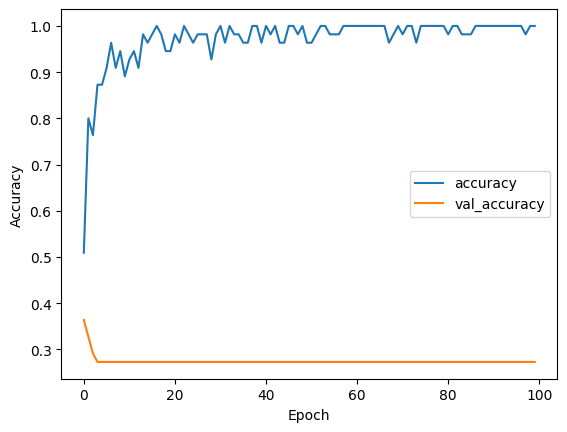

In [14]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
def load_images_from_folder(folder, img_size):
    images = []
    file_names = []

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)


        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img) / 255.0
        images.append(img)
        file_names.append(filename)

    return np.array(images), file_names

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


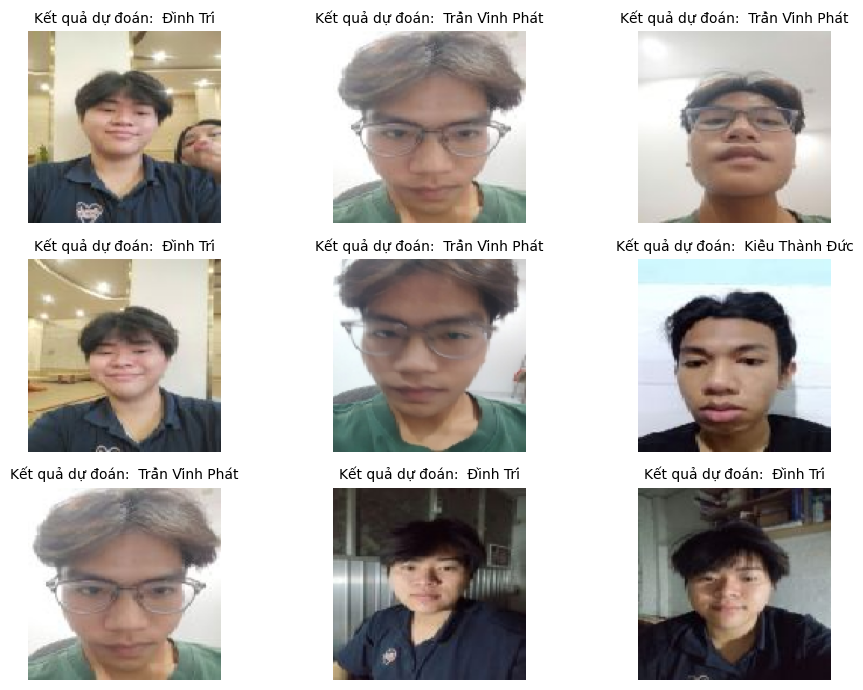

In [25]:
test_folder = "/content/drive/MyDrive/Faces_test"
test_images, test_file_names = load_images_from_folder(test_folder, (img_width, img_height))


predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_food_names = [class_labels[idx] for idx in predicted_labels]


rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 7))

axes = axes.flatten()
for i in range(min(rows * cols, len(test_images))):
    axes[i].imshow(test_images[i])
    axes[i].axis('off')
    axes[i].set_title(f"Kết quả dự đoán:  {predicted_food_names[i]}", fontsize=10)

plt.tight_layout()
plt.show()